In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Importing Dataset

In [142]:
# Load the Heart Disease UCI dataset into a Pandas DataFrame.
df = pd.read_csv("../data/heart_disease.csv", index_col='id')

### Some EDA

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 1 to 920
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 115.0+ KB


In [144]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Text(0.5, 1.0, 'Correlations between numeric features')

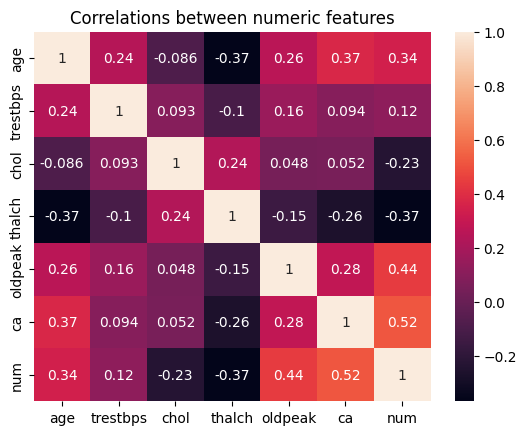

In [145]:
corr = df.select_dtypes(exclude='object').corr()
sns.heatmap(corr, annot=True)
plt.title("Correlations between numeric features")

# There is a strong correlation between ca and traget value
# so we can not remove it

Text(0.5, 1.0, 'Correlations between numeric features')

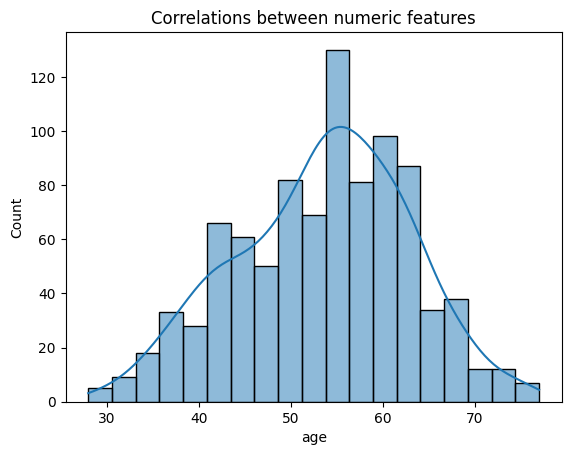

In [146]:
sns.histplot(df['age'], kde=True)
plt.title("Correlations between numeric features")

Text(0.5, 1.0, 'Correlations between numeric features')

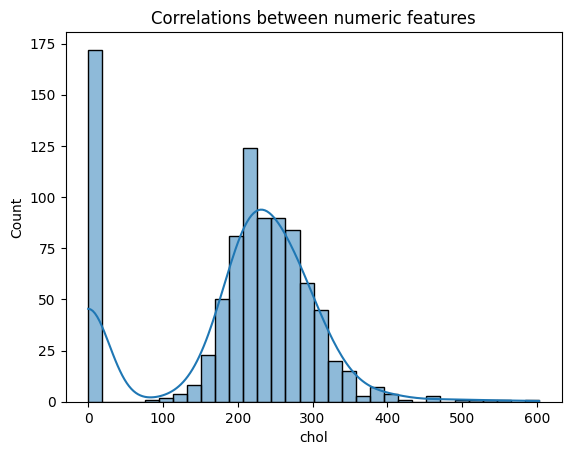

In [147]:
sns.histplot(df['chol'], kde=True)
plt.title("Correlations between numeric features")

<Axes: >

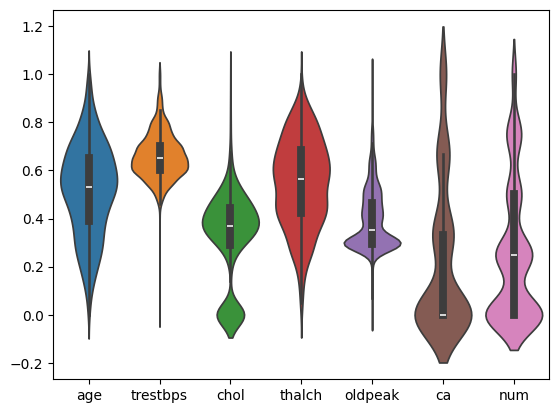

In [148]:
from sklearn.preprocessing import MinMaxScaler

# scale to make plot visible
scaler = MinMaxScaler()
cols = df.select_dtypes(exclude='object').columns

df_violin = pd.DataFrame(scaler.fit_transform(df.select_dtypes(exclude='object')), columns=cols)
sns.violinplot(df_violin)

In [149]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


<Axes: xlabel='oldpeak', ylabel='Count'>

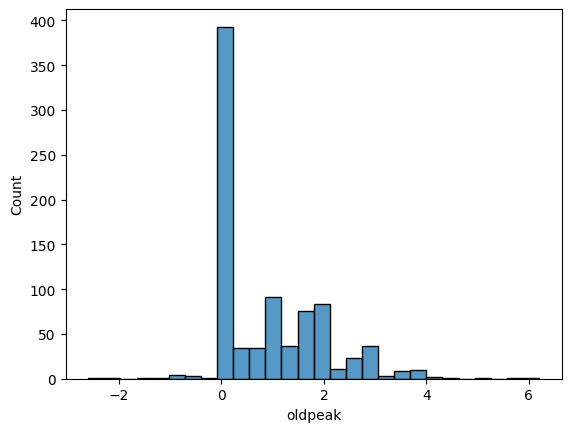

In [150]:
sns.histplot(df['oldpeak'])

<Axes: xlabel='count', ylabel='slope'>

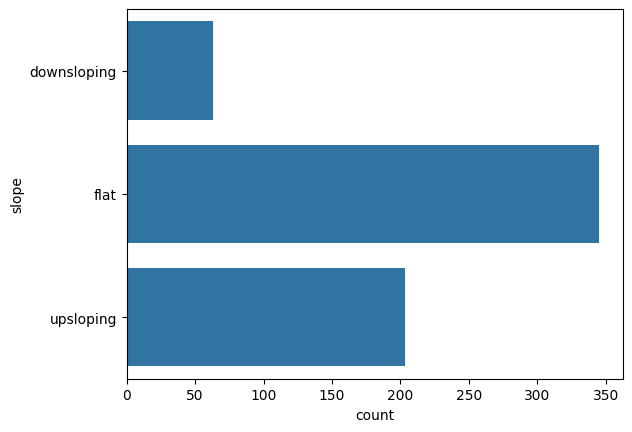

In [151]:
sns.countplot(df['slope'])

In [152]:
px.histogram(data_frame=df, x='age', color='dataset')

In [153]:
px.histogram(data_frame=df, x='num', color='cp')

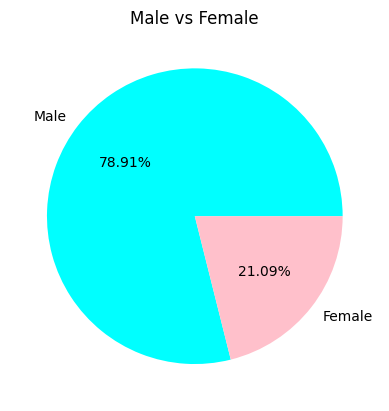

In [154]:
sex = df['sex'].value_counts()
plt.pie(x=sex, labels=sex.index, autopct='%.2f%%', colors=['cyan', 'pink'])
plt.title("Male vs Female")
plt.show()

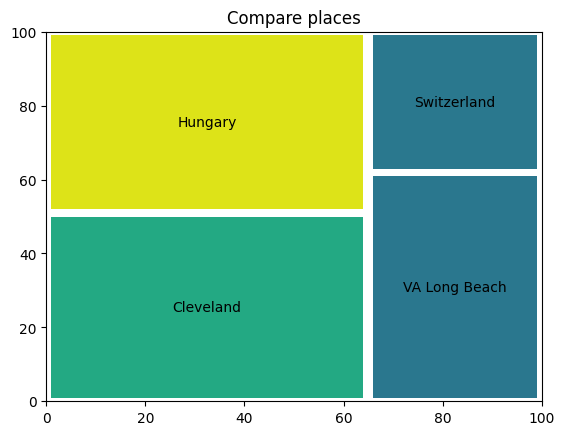

In [155]:
import squarify
cities = df['dataset'].value_counts()
squarify.plot(sizes=cities, label=cities.index, pad=True)
plt.title("Compare places")
plt.show()

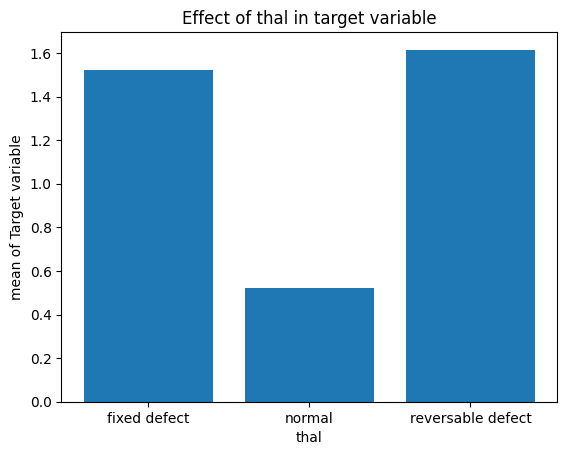

In [156]:
thal_num = df.groupby(['thal']).agg({
  'num': 'mean'
})
plt.bar(height=thal_num.values.flatten(), x=thal_num.index)
plt.xlabel("thal")
plt.ylabel("mean of Target variable")
plt.title("Effect of thal in target variable")
plt.show()

<Axes: >

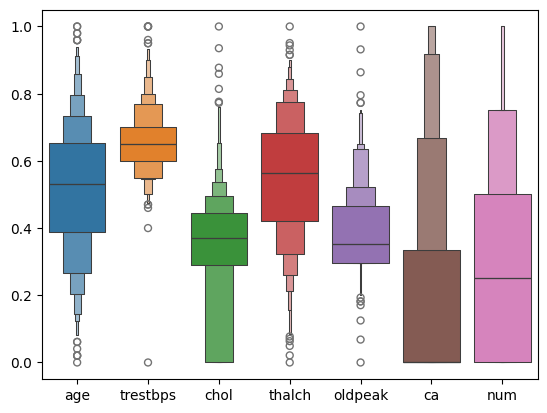

In [157]:
sns.boxenplot(df_violin)

## Fixing Missing Values:
- trestbps
- chol
- fbs
- restecg
- thalch
- exang
- oldpeak
- slope
- ca
- thal

In [158]:
df.isnull().sum()

age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

slope, ca, thal have lots of missing values so we will use Iterative imputer to fix this, and the rest with mean, median or mode

In [159]:
'''
We can see that 'trestbps' has outliers 0 so
I handled by butting normal thersholds then fill with mean
as mean is sensitive to outliers
'''
lower = 80
upper = 180
outliers = df[(df['trestbps'] < lower) | (df['trestbps'] > upper)] 
df = df[(df['trestbps'] >= lower) & (df['trestbps'] <= upper)] 

In [160]:
outliers

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
127,56,Female,Cleveland,asymptomatic,200.0,288.0,True,lv hypertrophy,133.0,True,4.0,downsloping,2.0,reversable defect,3
189,54,Male,Cleveland,atypical angina,192.0,283.0,False,lv hypertrophy,195.0,False,0.0,upsloping,1.0,reversable defect,1
339,39,Male,Hungary,atypical angina,190.0,241.0,False,normal,106.0,False,0.0,NaN,NaN,NaN,0
549,54,Male,Hungary,asymptomatic,200.0,198.0,False,normal,142.0,True,2.0,flat,NaN,NaN,1
681,61,Male,Switzerland,non-anginal,200.0,0.0,NaN,st-t abnormality,70.0,False,0.0,NaN,NaN,normal,3
701,63,Male,Switzerland,asymptomatic,185.0,0.0,False,normal,98.0,True,0.0,upsloping,NaN,reversable defect,1
702,64,Female,Switzerland,asymptomatic,200.0,0.0,False,normal,140.0,True,1.0,flat,NaN,normal,3
754,55,Male,VA Long Beach,non-anginal,0.0,0.0,False,normal,155.0,False,1.5,flat,NaN,NaN,3
897,61,Male,VA Long Beach,asymptomatic,190.0,287.0,True,lv hypertrophy,150.0,True,2.0,downsloping,NaN,NaN,4


In [161]:
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())

In [162]:
'''
As there are many outliers I replaced it with median
'''
df.loc[(df['chol'] < 100) | (df['chol'] > 400), 'chol'] = df['chol'].median() # for outliers
df['chol'].fillna(df['chol'].median(), inplace=True) # for missing values

C:\Users\yahia\AppData\Local\Temp\ipykernel_22088\2948616981.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [163]:
# fix outliers with IQR method
Q1 = df['oldpeak'].quantile(0.25)
Q3 = df['oldpeak'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
outliers = df[(df['oldpeak'] < lower) | (df['oldpeak'] > upper)]
df = df[(df['oldpeak'] >= lower) & (df['oldpeak'] <= upper)]

In [164]:
df['thalch'].fillna(df['thalch'].mean(), inplace=True)

C:\Users\yahia\AppData\Local\Temp\ipykernel_22088\4058627915.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [165]:
mode = df['fbs'].mode()[0]
df['fbs'].fillna(mode, inplace=True)

C:\Users\yahia\AppData\Local\Temp\ipykernel_22088\3252585177.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\yahia\AppData\Local\Temp\ipykernel_22088\3252585177.py:2: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [166]:
# fill with mode as it is categorical
mode = df['restecg'].mode()[0]
df['restecg'].fillna(mode, inplace=True)

C:\Users\yahia\AppData\Local\Temp\ipykernel_22088\287035377.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [167]:
mode = df['oldpeak'].mode()[0]
df['oldpeak'].fillna(mode, inplace=True)

C:\Users\yahia\AppData\Local\Temp\ipykernel_22088\1968132845.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





## Encoding Categorical data (Ont-hot encoding):
- sex
- dataset
- cp
- fbs
- restecg
- thal

In [168]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# categorical columns
categorical_cols = [col for col in df.columns if df[col].dtype == 'object'] 

# loop through each categorical column
for col in categorical_cols:
  df[col] = label_encoder.fit_transform(df[col])

In [169]:
# Fill ca and thal and slope with Iterative imputer as they are many
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

iterative_imputer_reg = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

df['ca'] = iterative_imputer_reg.fit_transform(df[['ca']])
df['thal'] = iterative_imputer_reg.fit_transform(df[['thal']])
df['slope'] = iterative_imputer_reg.fit_transform(df[['slope']])

In [170]:
# no other missing values and fixed outliers
df.isnull().sum()

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [171]:
# only binary 0 -> non disease, 1 for disease
df['num'] = (df['num'] > 0)*1

# to see if data is balanced or not
df['num'].value_counts()

num
1    443
0    387
Name: count, dtype: int64

In [172]:
from sklearn.preprocessing import StandardScaler

# select only numerical features as we
# encoded all categorical features and megred them in df as before
target = df[['num']] # separate target columns (not scaled)

df = df.select_dtypes(exclude='object').drop('num', axis=1)

scaler = StandardScaler()
scaled = scaler.fit_transform(df)

df[df.columns] = scaled
df = df.merge(target, on='id')
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,1.065390,0.541142,-1.04184,2.351387,0.769256,-0.126981,2.558409,-1.565768,0.471903,-0.784083,1.510009,-1.867819,-1.187479,-2.275033,0
2,1.491392,0.541142,-1.04184,-0.822030,1.628201,1.087343,-0.390868,-1.565768,-1.163014,1.275375,0.696701,-0.809601,4.360276,-1.226572,1
3,1.491392,0.541142,-1.04184,-0.822030,-0.662319,-0.218628,-0.390868,-1.565768,-0.345556,1.275375,1.814999,-0.809601,2.511024,-0.178112,1
4,-1.703624,0.541142,-1.04184,1.293582,-0.089689,0.262519,-0.390868,0.075125,1.912187,-0.784083,2.729970,-1.867819,-1.187479,-1.226572,0
5,-1.277621,-1.847943,-1.04184,0.235776,-0.089689,-0.791422,-0.390868,-1.565768,1.328288,-0.784083,0.595037,0.248618,-1.187479,-1.226572,0


In [173]:
# Renaming Columns Properly

new_cols = ['Age', 
            'Sex', 
            'Origin', 
            'Chest Pain Type', 
            'Resting Blood Pressure',
            'Cholesterol',
            'fasting blood sugar',
            'Resting Electrocardiographic',
            'Maximum Heart Rate',
            'Exercise-induced Angina',
            'ST Depression',
            'slope',
            'number of major vessels',
            'thal',
            'target'
            ]

df.columns = new_cols

In [174]:
# save preprocessed dataset
df.to_csv("../data/cleaned.csv")